# Exercises

## 1. 

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml("mnist_784", as_frame=False) #With as_frame=False, openml returns a NumPy array

C:\Users\Finn\miniconda3\envs\homl3\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X = mnist.data
y = mnist.target

In [4]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")

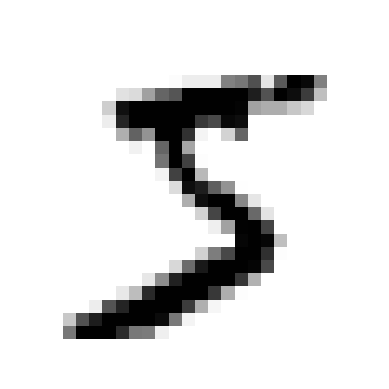

Label: 5


In [5]:
# Testing the function

plot_digit(X[0])
plt.show()
print(f"Label: {y[0]}")

## Exploring the data

### General Shape and dtypes of Attribute

In [6]:
# Copy dataset to expiriment
X_ = X.copy()
y_ = y.copy()

In [7]:
X_

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [8]:
y_

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [33]:
print(type(X_))
print(type(y_))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [10]:
print(X_.shape)
print(y_.shape)

(70000, 784)
(70000,)


In [11]:
28 * 28

784

70,000 Images with 28 * 28 pixels each

In [32]:
type(X_[0][0])

numpy.float64

In [20]:
np.unique(X_)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122., 123., 124., 125., 126., 127., 128., 129., 130., 131.,
       132., 133., 134., 135., 136., 137., 138., 139., 140., 141., 142.,
       143., 144., 145., 146., 147., 148., 149., 15

Apparently only integers between 0 and 2^8 - 1

In [29]:
type(y_[0])

str

=> String?

In [34]:
np.unique(y_)

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

Only strings from '0' to '9'

### Looking for missing values

In [35]:
np.isnan(X_).sum() # Number of missing entries in X

0

### Looking at the noisiness of of the data

Pixel variance

(784,)


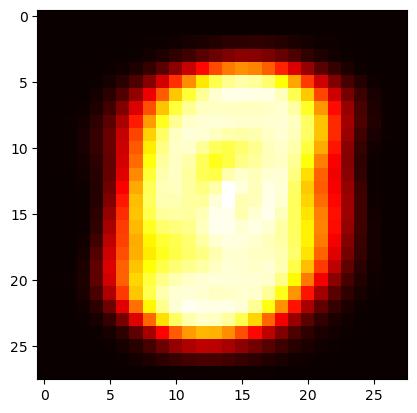

In [41]:
pixel_variance = np.var(X_, axis=0)
print(pixel_variance.shape)

plt.imshow(pixel_variance.reshape(28, 28), cmap="hot")
plt.show()

The center pixels seem to be have greater importance. 

### Looking at the distributions

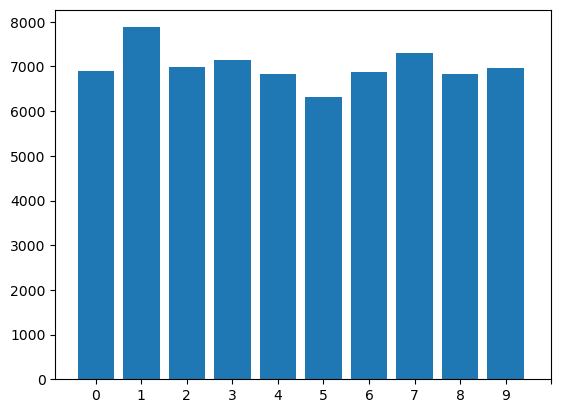

In [9]:
y_.sort()
plt.hist(y_, bins=range(11), align="left", rwidth=0.8)
plt.xticks(range(11))
plt.show()

Seems to be pretty evenly distributed, but 1 and 7 stick out slightly
=> Uniform distribution

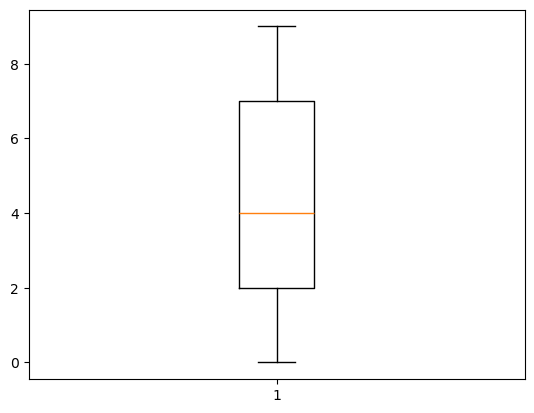

In [43]:
plt.boxplot(y_.astype(int))
plt.show()

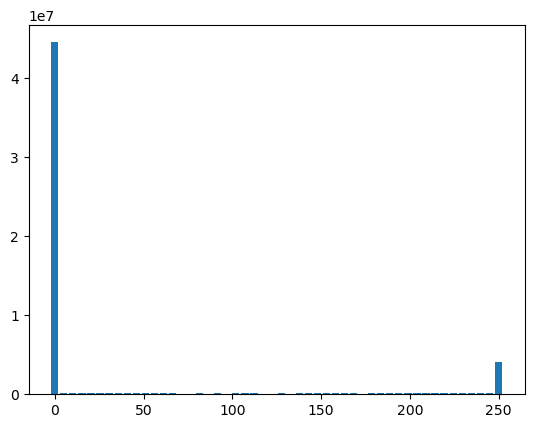

In [47]:
X_flattened = X_.flatten()
plt.hist(X_flattened, bins=50, align="left", rwidth=0.8, )
plt.show()